In [3]:
from google.colab import files
uploaded = files.upload()


Saving grouping2g.csv to grouping2g (1).csv


In [4]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['grouping2g.csv']))

In [5]:
covid_data= data.drop(['Unnamed: 0'],axis=1)
covid_data

,Location,Total,diff_with_previous_day,Hospitalizations,Deceased,Recovered,Current Cases,New cases (last 7 days),New cases(previous week),Rhineland-pfalz(100000 cases)USAF(100000 cases)),<20 years(100000 cases),20-59 years(100000 cases),>= 60 years(100000 cases)
0,Ahrweiler,19256,1,684,38,24912,30,1531,2316,1173.4,1173.4,1691.0,1382.5
1,Ahrweiler,6225,35,220,15,6174,5760,254,233,194.7,194.7,136.2,238.9
2,Ahrweiler,6192,33,219,15,6110,5791,261,222,200.0,200.0,131.8,246.6
3,Ahrweiler,6112,80,219,15,5964,5857,261,234,200.0,200.0,101.0,265.1
4,Ahrweiler,6025,87,205,14,5963,5772,293,237,224.6,224.6,101.0,291.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,Westerwaldkreis,24772,550,650,36,26751,5963,1472,1295,725.7,725.7,647.4,940.7
6296,Westerwaldkreis,24558,214,649,36,26751,5749,1167,1457,575.4,575.4,506.4,753.7
6297,Westerwaldkreis,24178,380,645,36,26752,5368,1548,1177,763.2,763.2,660.5,1007.1
6298,Westerwaldkreis,15446,296,535,33,18957,4434,1333,1852,657.2,657.2,498.6,823.9


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

#Extract features
X =covid_data[['<20 years(100000 cases)', '20-59 years(100000 cases)', '>= 60 years(100000 cases)']].values

#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

#Define the input and output variables
X_input = X_scaled[:-1]
Y_output = X_scaled[1:]

#Reshape the input and output variables
X_input = X_input.reshape(X_input.shape[0], 1, X_input.shape[1])
Y_output = Y_output.reshape(Y_output.shape[0], 1, Y_output.shape[1])

#Define the LSTM model architecture
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_input.shape[2])))
model.add(Dense(Y_output.shape[2]))

#Compile the model
model.compile(loss='mse', optimizer='adam')

#Train the model
model.fit(X_input, Y_output, epochs=50, batch_size=1, verbose=1)

#Predict the future values of the age group cases
X_test = X_scaled.reshape(X_scaled.shape[0],1,X_scaled.shape[1])
Y_pred = model.predict(X_test)


Epoch 1/50
6299/6299 [==============================] - 19s 3ms/step - loss: 0.0035
Epoch 2/50
6299/6299 [==============================] - 15s 2ms/step - loss: 0.0032
Epoch 3/50
6299/6299 [==============================] - 15s 2ms/step - loss: 0.0032
Epoch 4/50
6299/6299 [==============================] - 15s 2ms/step - loss: 0.0032
Epoch 5/50
6299/6299 [==============================] - 16s 3ms/step - loss: 0.0032
Epoch 6/50
6299/6299 [==============================] - 16s 2ms/step - loss: 0.0031
Epoch 7/50
6299/6299 [==============================] - 15s 2ms/step - loss: 0.0032
Epoch 8/50
6299/6299 [==============================] - 15s 2ms/step - loss: 0.0031
Epoch 9/50
6299/6299 [==============================] - 16s 3ms/step - loss: 0.0031
Epoch 10/50
6299/6299 [==============================] - 16s 3ms/step - loss: 0.0031
Epoch 11/50
6299/6299 [==============================] - 15s 2ms/step - loss: 0.0031
Epoch 12/50
6299/6299 [==============================] - 16s 2ms/step - lo

In [22]:
# Rescale the predicted values
Y_pred_rescaled = scaler.inverse_transform(Y_pred.reshape(Y_pred.shape[0], Y_pred.shape[1]))

# Add a new column for predicted values to the data DataFrame
covid_data['<20_years_predicted'] = Y_pred_rescaled[:,0]
covid_data['20-59_years_predicted'] = Y_pred_rescaled[:,1]
covid_data['>=60_years_predicted'] = Y_pred_rescaled[:,2]

# Print the actual and predicted values for each row
covid_data

,Location,Total,diff_with_previous_day,Hospitalizations,Deceased,Recovered,Current Cases,New cases (last 7 days),New cases(previous week),Rhineland-pfalz(100000 cases)USAF(100000 cases)),<20 years(100000 cases),20-59 years(100000 cases),>= 60 years(100000 cases),<20_years_predicted,20-59_years_predicted,>=60_years_predicted
0,Ahrweiler,19256,1,684,38,24912,30,1531,2316,1173.4,1173.4,1691.0,1382.5,1145.518066,1540.179688,1428.802490
1,Ahrweiler,6225,35,220,15,6174,5760,254,233,194.7,194.7,136.2,238.9,274.744537,174.728806,352.153046
2,Ahrweiler,6192,33,219,15,6110,5791,261,222,200.0,200.0,131.8,246.6,276.642761,169.698151,355.002594
3,Ahrweiler,6112,80,219,15,5964,5857,261,234,200.0,200.0,101.0,265.1,266.668884,137.000427,353.335052
4,Ahrweiler,6025,87,205,14,5963,5772,293,237,224.6,224.6,101.0,291.3,282.525696,134.678558,370.176697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,Westerwaldkreis,24772,550,650,36,26751,5963,1472,1295,725.7,725.7,647.4,940.7,731.624512,688.195190,959.544373
6296,Westerwaldkreis,24558,214,649,36,26751,5749,1167,1457,575.4,575.4,506.4,753.7,602.791626,547.724731,795.494690
6297,Westerwaldkreis,24178,380,645,36,26752,5368,1548,1177,763.2,763.2,660.5,1007.1,763.041016,707.017273,1013.283813
6298,Westerwaldkreis,15446,296,535,33,18957,4434,1333,1852,657.2,657.2,498.6,823.9,665.043762,540.061279,850.073853


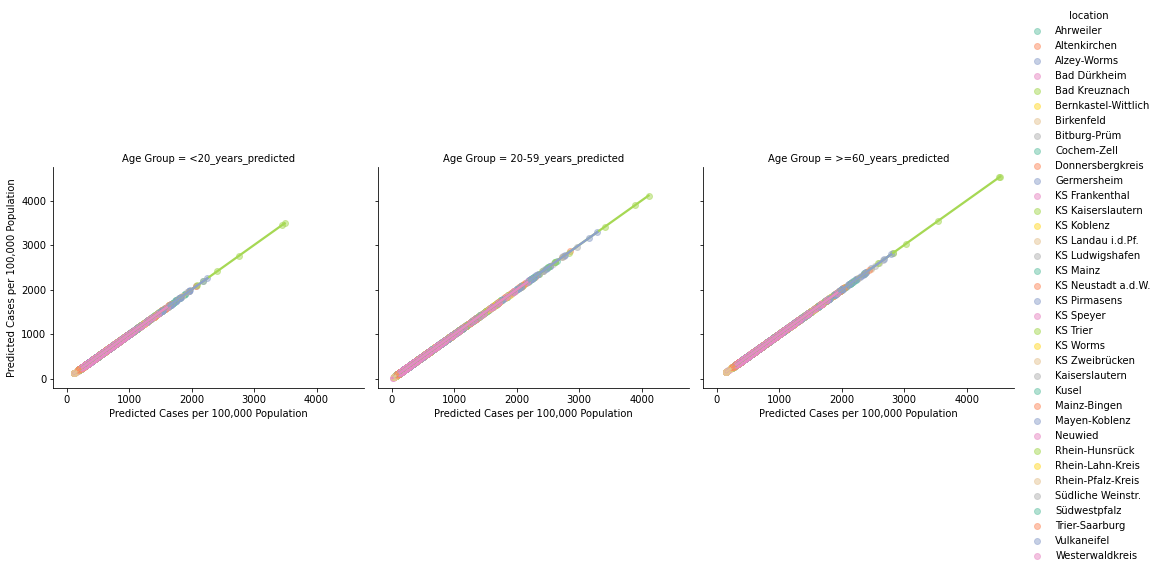

In [37]:
import seaborn as sn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

predicted_data = pd.DataFrame({
    '<20_years': covid_data['<20 years(100000 cases)'],
    '20-59_years': covid_data['20-59 years(100000 cases)'],
    '>=60_years': covid_data['>= 60 years(100000 cases)'],
    '<20_years_predicted': covid_data['<20_years_predicted'],
    '20-59_years_predicted': covid_data['20-59_years_predicted'],
    '>=60_years_predicted': covid_data['>=60_years_predicted'],
    'location': covid_data['Location']
})

# Melt the DataFrame to convert it from wide to long format
predicted_data_melted = pd.melt(
    predicted_data,
    id_vars=['location','<20_years', '20-59_years', '>=60_years'],
    value_vars=['<20_years_predicted', '20-59_years_predicted', '>=60_years_predicted'],
    var_name='Age Group',
    value_name='Predicted Cases per 100,000 Population'
)

# Create the scatter plot using lmplot
sn.lmplot(
    x='Predicted Cases per 100,000 Population',
    y='Predicted Cases per 100,000 Population',
    data=predicted_data_melted,
    col='Age Group',
    col_wrap=3,
    hue='location',
    palette='Set2', 
    height=4,
    aspect=1.2,
    scatter_kws={'alpha': 0.5}
)


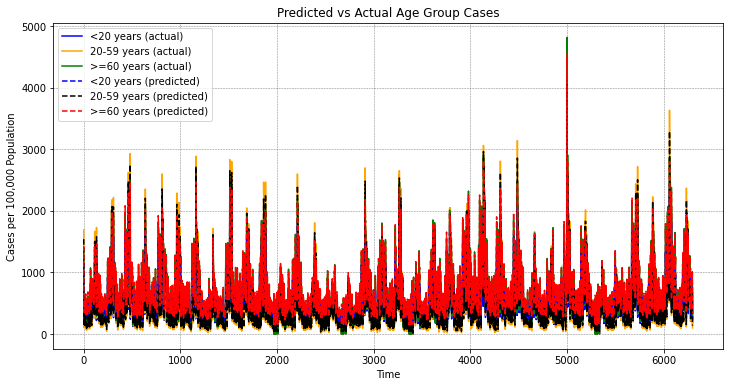

In [43]:
import matplotlib.pyplot as plt

# Create a time axis
time = np.arange(covid_data.shape[0])

# Plot the actual and predicted data for each age group
plt.figure(figsize=(12,6))
plt.plot(time, covid_data['<20 years(100000 cases)'], label='<20 years (actual)', color='blue')
plt.plot(time, covid_data['20-59 years(100000 cases)'], label='20-59 years (actual)', color='orange')
plt.plot(time, covid_data['>= 60 years(100000 cases)'], label='>=60 years (actual)', color='green')
plt.plot(time, covid_data['<20_years_predicted'], label='<20 years (predicted)', linestyle='--', color='blue')
plt.plot(time, covid_data['20-59_years_predicted'], label='20-59 years (predicted)', linestyle='--', color='black')
plt.plot(time, covid_data['>=60_years_predicted'], label='>=60 years (predicted)', linestyle='--', color='red')
plt.xlabel('Time')
plt.ylabel('Cases per 100,000 Population')
plt.title('Predicted vs Actual Age Group Cases')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')
plt.show()